<a href="https://colab.research.google.com/github/eeyvee-0x4d/cs-thesis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Clone repository</h1>

In [1]:
# Clone the entire repo.
!git clone -l -s https://github.com/eeyvee-0x4d/cs-thesis thesis
%cd thesis
!ls

Cloning into 'thesis'...
remote: Enumerating objects: 1236, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1236 (delta 2), reused 6 (delta 2), pack-reused 1227
Receiving objects: 100% (1236/1236), 104.12 MiB | 11.91 MiB/s, done.
Resolving deltas: 100% (535/535), done.
/content/thesis
client	Dataset  kaggle_tweets.csv  Notebook  README.md  server  StreamingAPI


In [2]:
!pip install stopwordsiso
!pip install imbalanced-learn

from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

import nltk
import stopwordsiso

from nltk.stem import *
from nltk.corpus import stopwords
from nltk.util import ngrams

nltk.download("punkt")
nltk.download("stopwords")

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import re
import json
import pandas as pd

     |████████████████████████████████| 73 kB 1.4 MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<h1>Text Preprocessing</h1>
<ul>
  <li>Import dataset</li>
  <li>Remove urls</li>
  <li>Remove special characters</li>
  <li>Convert text data to lowercase</li>
</ul>

In [3]:
df = pd.read_csv('/content/thesis/Dataset/training_data.csv') #read csv

# remove urls, remove special chars, conver to lowercase
for i in range(df.shape[0]):
  string = re.sub(r'http\S+', '', df.at[i, 'Text']).lower()
  string = re.sub(r'[^a-zA-Z0-9 ]', '', string)
  df.at[i, 'Text'] = re.sub(r'\n', ' ', string)

<h1>Natural Language Toolkit NLTK</h1>
<p>
Nltk will be used to preprocess to corpus.
</p>

<h1>Stemming words using Porter Stemmer</h1>
<p>
Apply porter stemmer to each tokens first then rebuild the tokens into sentence.
</p>
<hr>
<h1>Stop words removal</h1>
<p>
Remove stop words in english and tagalog.
</p>

In [4]:
stemmer = PorterStemmer() # Porter Stemmer

stopwords_eng = set(stopwords.words('english')) # English stopwords
stopwords_tl  = set(stopwordsiso.stopwords('tl'))
filtered_sentence = []
filtered_sentence2 = []

for i in range(len(df['Text'])):
  document = df.loc[i, 'Text']
  tokens = nltk.word_tokenize(document)

  filtered_sentence = [token for token in tokens if not token in stopwords_eng] # remove english stopwords
  filtered_sentence2 = [token for token in filtered_sentence if not token in stopwords_tl] #remove tagalog stopwords
  stemmed_tokens = [stemmer.stem(token) for token in filtered_sentence2] # stem each words

  document = " ".join(stemmed_tokens)
  df.loc[i, 'Text'] = document

# Create n-grams from 1-4

Create n-grams from 1 to 4 for exprementational purposes. Use params `ngram_range=(1,1)`, `ngram_range=(1,2)`, `ngram_range=(1,3)`, `ngram_range=(1,4)` in `TfidfVectorizer(ngram_range=(1,1))`.
Default is `ngram_range=(1,1)`



---


# Perform TF-IDF to the corpus


In [5]:
X = df['Text'] # tweets
y = df['Sentiment'] # labels

"""
X_train = train data
y_train = train data labels

X_test = test data
y_test = test data labels
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
# 1-gram
vectorizer = TfidfVectorizer(ngram_range=(1, 1)) # Initialize vectorizer
train_data_features = vectorizer.fit_transform(X_train)
test_data_features = vectorizer.transform(X_test)

In [ ]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
x_oversampled, y_oversampled = oversample.fit_resample(x_train_features, y)

## Using Validated data
##### unigram

|index|param\_alpha|mean\_test_accuracy|mean\_test_f1|mean\_test_precision|mean\_test_recall|
|---|---|---|---|---|---|
|0|1|0\.8484745413316842|0\.9098677485838991|0\.8404345867536123|0\.9933508771929824|
|1|0\.1|0\.9105029890744177|0\.9409872306685416|0\.9476166557687631|0\.9360877192982455|
|2|0\.01|0\.9033601319315606|0\.9356093061872441|0\.9474796070710656|0\.9254035087719299|
|3|0\.001|0\.8942279942279943|0\.9300622773471605|0\.9350463221643295|0\.9267543859649121|
|4|0\.0001|0\.8820140177283035|0\.922532197804894|0\.9224600519460265|0\.9240877192982456|
|5|1e-05|0\.8810039167182024|0\.922029353400361|0\.9201066895112724|0\.9254210526315789|

##### Oversampled
|index|param\_alpha|mean\_test_accuracy|mean\_test_f1|mean\_test_precision|mean\_test_recall|
|---|---|---|---|---|---|
|0|1|0\.9501280353200883|0\.9480888476435121|0\.9719458269355498|0\.9267368421052632|
|1|0\.1|0\.9574525386313466|0\.9558748625063916|0\.9831689733542959|0\.9307368421052631|
|2|0\.01|0\.955448123620309|0\.9535202234588036|0\.9830977540315505|0\.9267543859649121|
|3|0\.001|0\.9541147902869757|0\.9521389375216422|0\.9831276444355851|0\.9240877192982454|
|4|0\.0001|0\.9534481236203091|0\.9514400278207755|0\.9831276444355851|0\.9227543859649122|
|5|1e-05|0\.9534481236203091|0\.9514400278207755|0\.9831276444355851|0\.9227543859649122|

##### bigram
|index|param\_alpha|mean\_test_accuracy|mean\_test_f1|mean\_test_precision|mean\_test_recall|
|---|---|---|---|---|---|
|0|1|0\.8048134405277263|0\.8864505489024577|0\.7998187019212091|0\.9946666666666667|
|1|0\.1|0\.890146361574933|0\.9249702511083866|0\.9573592422296999|0\.8974561403508773|
|2|0\.01|0\.8687693259121831|0\.9075150445523669|0\.9689925240289956|0\.8561929824561403|
|3|0\.001|0\.8657596371882086|0\.9068860637028735|0\.9569575001446088|0\.8642105263157894|
|4|0\.0001|0\.8688414759843331|0\.9103896152391343|0\.9440900716608864|0\.881561403508772|
|5|1e-05|0\.8617295403009688|0\.9062835908878745|0\.9322961248763425|0\.8842105263157893|

##### Oversampled
|index|param\_alpha|mean\_test_accuracy|mean\_test_f1|mean\_test_precision|mean\_test_recall|
|---|---|---|---|---|---|
|index|param\_alpha|mean\_test_accuracy|mean\_test_f1|mean\_test_precision|mean\_test_recall|
|---|---|---|---|---|---|
|0|1|0\.9567682119205297|0\.9547695098550623|0\.9797326308838352|0\.9333859649122808|
|1|0\.1|0\.9680750551876379|0\.9664373933753148|0\.9908051948051948|0\.9453859649122809|
|2|0\.01|0\.9641015452538632|0\.9628292802819237|0\.9857874952417205|0\.942719298245614|
|3|0\.001|0\.9627726269315673|0\.9614191092941254|0\.9857874952417205|0\.9400701754385963|
|4|0\.0001|0\.9621103752759381|0\.9607005124547232|0\.9855659082701337|0\.9387543859649122|
|5|1e-05|0\.9621103752759381|0\.9607005124547232|0\.9855659082701337|0\.9387543859649122|

##### trigram
|index|param\_alpha|mean\_test_accuracy|mean\_test_f1|mean\_test_precision|mean\_test_recall|
|---|---|---|---|---|---|
|0|1|0\.7926406926406926|0\.8802654167233952|0\.7888546642061078|0\.9960000000000001|
|1|0\.1|0\.8759224902082045|0\.9133151627301638|0\.964941665028552|0\.8694561403508774|
|2|0\.01|0\.8169758812615955|0\.862384101426233|0\.985647318013047|0\.7722807017543859|
|3|0\.001|0\.8362605648319933|0\.878572032662607|0\.9830594241723378|0\.8002456140350876|
|4|0\.0001|0\.8433415790558646|0\.8871891637340376|0\.9590258014133253|0\.8308947368421051|
|5|1e-05|0\.8444238301381158|0\.8910702790846907|0\.9461668498406144|0\.8455789473684211|

##### Oversampled
|index|param\_alpha|mean\_test_accuracy|mean\_test_f1|mean\_test_precision|mean\_test_recall|
|---|---|---|---|---|---|
|0|1|0\.9647373068432671|0\.9625604680861816|0\.9946472446472446|0\.934719298245614|
|1|0\.1|0\.9760706401766006|0\.9753499373431864|0\.992030492030492|0\.9600526315789473|
|2|0\.01|0\.9760706401766004|0\.975384633019776|0\.9907692307692308|0\.9613859649122807|
|3|0\.001|0\.9687637969094922|0\.9676604017054176|0\.988102564102564|0\.9493859649122808|
|4|0\.0001|0\.9687637969094922|0\.9676604017054176|0\.988102564102564|0\.9493859649122808|
|5|1e-05|0\.9680971302428256|0\.9669892607658204|0\.988102564102564|0\.9480526315789474|

##### 4-gram
|index|param\_alpha|mean\_test_accuracy|mean\_test_f1|mean\_test_precision|mean\_test_recall|
|---|---|---|---|---|---|
|0|1|0\.787569573283859|0\.877818938030709|0\.7840721161703361|0\.9973333333333333|
|1|0\.1|0\.8504844361987219|0\.8926213241418338|0\.9684824915857642|0\.8321403508771932|
|2|0\.01|0\.7793135435992579|0\.8284741097744662|0\.9895755964686099|0\.7190350877192984|
|3|0\.001|0\.802721088435374|0\.8490527922660849|0\.9868668501939302|0\.7522982456140351|
|4|0\.0001|0\.8250773036487322|0\.868941289840188|0\.981353083069501|0\.7869122807017543|
|5|1e-05|0\.8321789321789321|0\.8770300477579459|0\.9663329308718183|0\.809578947368421|

##### Oversampled
|index|param\_alpha|mean\_test_accuracy|mean\_test_f1|mean\_test_precision|mean\_test_recall|
|---|---|---|---|---|---|
|0|1|0\.9627682119205299|0\.961243299781015|0\.9855685722727976|0\.9400526315789474|
|1|0\.1|0\.9787373068432672|0\.9785436644156977|0\.9860543184885291|0\.9720350877192981|
|2|0\.01|0\.9774128035320089|0\.9772829293587983|0\.9859435589948582|0\.9693684210526318|
|3|0\.001|0\.9734172185430465|0\.9729853069470735|0\.9857962213225371|0\.9613859649122809|
|4|0\.0001|0\.9700927152317881|0\.9693889682442052|0\.9857962213225371|0\.9547192982456141|
|5|1e-05|0\.9694304635761588|0\.9687268852291812|0\.9857629212892369|0\.9534035087719298|




In [21]:
parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'ROC': make_scorer(roc_auc_score)
}
mnb = MultinomialNB()
classifier = GridSearchCV(mnb, parameters, return_train_score=False, cv=10, scoring=scorers, refit='accuracy')
classifier.fit(train_data_features, y_train)
# classifier.fit(x_oversampled, y_oversampled)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             refit='accuracy',
             scoring={'ROC': make_scorer(roc_auc_score),
                      'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [22]:
results = pd.DataFrame(classifier.cv_results_)
results[['param_alpha', 'mean_test_accuracy', 'mean_test_f1', 'mean_test_precision', 'mean_test_recall', 'rank_test_accuracy']]

,param_alpha,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall,rank_test_accuracy
0,1,0.853842,0.910668,0.845854,0.986807,6
1,0.1,0.919436,0.945851,0.957352,0.935246,1
2,0.01,0.910505,0.939299,0.955001,0.924719,2
3,0.001,0.899564,0.932348,0.942155,0.923404,4
4,0.0001,0.901564,0.933898,0.941153,0.927386,3
5,0.00001,0.897584,0.931424,0.936209,0.927404,5


In [30]:
y_pred = classifier.predict(test_data_features) # classifier predictions
y_true = y_test # ground truth

accuracy = accuracy_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred) * 100
recall = recall_score(y_true, y_pred) * 100

print(f"Accuracy: {accuracy} F1 Score: {f1} Precision: {precision} Recall: {recall}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"Confusion Matrix: \nTrue Negative: {tn} False Positive: {fp} False Negative: {fn} True Positive: {tp}")

Accuracy: 91.415313225058 F1 Score: 94.28129829984545 Precision: 91.5915915915916 Recall: 97.13375796178345
Confusion Matrix: 
True Negative: 89 False Positive: 28 False Negative: 9 True Positive: 305


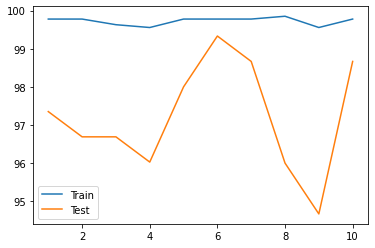

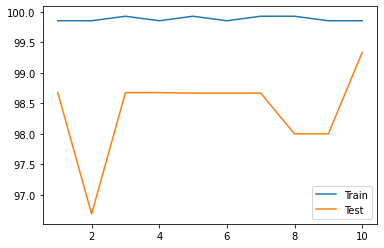

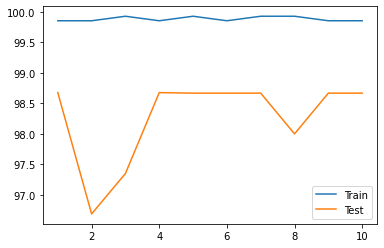

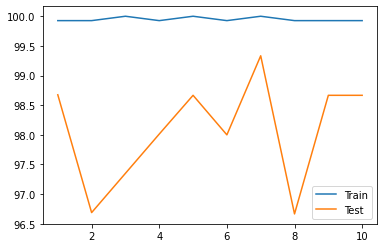

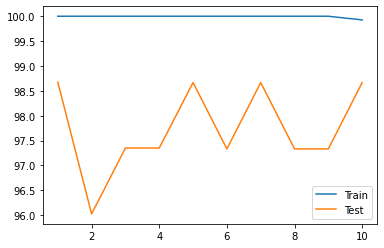

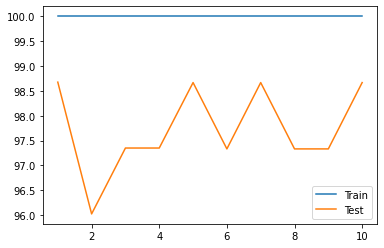

In [ ]:
from matplotlib import pyplot

results = pd.DataFrame(classifier.cv_results_)

values = [i for i in range(1, 11)]

for alpha in results['param_alpha']:
  result = results.loc[results['param_alpha'] == alpha]
  result1 = result[['split0_train_accuracy', 'split1_train_accuracy', 'split2_train_accuracy', 'split3_train_accuracy', 'split4_train_accuracy', 'split5_train_accuracy', 'split6_train_accuracy', 'split7_train_accuracy', 'split8_train_accuracy', 'split9_train_accuracy']]
  result2 = result[['split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'split9_test_accuracy']]
  
  train_scores = [result1[key] * 100 for key in result1.keys()]
  test_scores = [result2[key] * 100 for key in result2.keys()]

  # for key in result1.keys():
  #   print(result1.keys())
  #   print(result1[key])
  pyplot.plot(values, train_scores, '-', label='Train')
  pyplot.plot(values, test_scores, '-', label='Test')
  pyplot.legend()
  pyplot.show()

In [ ]:
best = results.loc[results['rank_test_accuracy'] == 1]
best[['param_alpha', 'mean_test_accuracy', 'mean_test_f1', 'mean_test_precision', 'mean_test_recall', 'rank_test_accuracy']]

model_stats = {
  "accuracy": round(float(best['mean_test_accuracy'] * 100), 2),
  "precision": round(float(best['mean_test_precision'] * 100), 2),
  "recall": round(float(best['mean_test_recall'] * 100), 2),
  "f1score": round(float(best['mean_test_f1'] * 100), 2)
}

# convert into JSON:
model_stats = json.dumps(model_stats)

with open("model_stats.json", "w") as outfile:
    outfile.write(model_stats)

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

pred = classifier.predict(x_oversampled)
tn, fp, fn, tp = confusion_matrix(y_oversampled, pred).ravel()
print(f"True Negative: {tn} False Positive: {fp} False Negative: {fn} True Postive: {tp}")

True Negative: 752 False Positive: 0 False Negative: 2 True Postive: 750


In [ ]:
import pickle

pickle.dump(classifier, open('model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))